# EDA

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [169]:
df = pd.read_excel('C:/Users/QI/Desktop/2022summer/Intern/Guzman Energy/May2022_homework-main/data/Assignment 3 - timeseries_data.xlsx')

In [170]:
df.head()

,DATETIME,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD),HOURENDING,MARKETDAY,PEAKTYPE,MONTH,YEAR
0,2017-01-01 01:00:00,23.3575,2155.31,0.0,29485.791355,1,2017-01-01,OFFPEAK,JANUARY,2017
1,2017-01-01 02:00:00,21.4650,2313.81,0.0,28911.565913,2,2017-01-01,OFFPEAK,JANUARY,2017
2,2017-01-01 03:00:00,20.7350,2587.68,0.0,28238.258175,3,2017-01-01,OFFPEAK,JANUARY,2017
3,2017-01-01 04:00:00,20.2700,2748.65,0.0,27821.000513,4,2017-01-01,OFFPEAK,JANUARY,2017
4,2017-01-01 05:00:00,20.1200,2757.49,0.0,27646.942413,5,2017-01-01,OFFPEAK,JANUARY,2017


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14987 entries, 0 to 14986
Data columns (total 10 columns):
DATETIME                       14987 non-null datetime64[ns]
HB_NORTH (RTLMP)               14987 non-null float64
ERCOT (WIND_RTI)               14982 non-null float64
ERCOT (GENERATION_SOLAR_RT)    14983 non-null float64
ERCOT (RTLOAD)                 14987 non-null float64
HOURENDING                     14987 non-null int64
MARKETDAY                      14987 non-null datetime64[ns]
PEAKTYPE                       14987 non-null object
MONTH                          14987 non-null object
YEAR                           14987 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(2), object(2)
memory usage: 1.1+ MB


In [201]:
df.PEAKTYPE.value_counts()

WDPEAK     6966
OFFPEAK    4997
WEPEAK     3024
Name: PEAKTYPE, dtype: int64

In [202]:
df.MONTH.value_counts()

AUGUST       1488
JANUARY      1488
MAY          1488
JULY         1488
MARCH        1486
JUNE         1440
APRIL        1440
FEBRUARY     1344
SEPTEMBER    1116
DECEMBER      744
OCTOBER       744
NOVEMBER      721
Name: MONTH, dtype: int64

In [172]:
df.describe()

,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD),HOURENDING,YEAR
count,14987.000000,14982.000000,14983.000000,14987.000000,14987.000000,14987.000000
mean,25.766417,7532.436283,291.989714,42371.673703,12.495763,2017.415493
std,46.361945,3992.884834,370.914596,9874.339631,6.922309,0.492823
min,-17.860000,54.440000,0.000000,25566.511248,1.000000,2017.000000
25%,18.041250,4135.630000,0.000000,35431.636526,6.000000,2017.000000
50%,20.057500,7281.445000,22.150000,39934.007113,12.000000,2017.000000
75%,25.030000,10851.647500,608.635000,47873.100786,18.000000,2018.000000
max,2809.357500,20350.400000,1257.540000,73264.662123,24.000000,2018.000000


In [173]:
df.iloc[:,1:5].duplicated().sum()#check duplicates

0

In [174]:
df.iloc[:,1:5].isna().sum()#check NAs

HB_NORTH (RTLMP)               0
ERCOT (WIND_RTI)               5
ERCOT (GENERATION_SOLAR_RT)    4
ERCOT (RTLOAD)                 0
dtype: int64

In [175]:
dff = df.copy()#get a copy of the source data
dff['DATETIME'] = pd.to_datetime(dff['DATETIME'])
print(dff.dtypes)

DATETIME                       datetime64[ns]
HB_NORTH (RTLMP)                      float64
ERCOT (WIND_RTI)                      float64
ERCOT (GENERATION_SOLAR_RT)           float64
ERCOT (RTLOAD)                        float64
HOURENDING                              int64
MARKETDAY                      datetime64[ns]
PEAKTYPE                               object
MONTH                                  object
YEAR                                    int64
dtype: object


In [176]:
dff['ERCOT (WIND_RTI)'].interpolate(method='pad', inplace=True)#fill the missing value with the previous value
dff['ERCOT (GENERATION_SOLAR_RT)'].interpolate(method='pad', inplace=True)
'''for j in range(1,5):
    for i in range(dff.shape[0]):
        if(np.isnan(dff.iloc[i,j])):
            dff.iloc[i,j] = dff.iloc[i-1,j]'''
print(dff.iloc[:,1:5].isna().sum())
print(dff.iloc[:,1:5].isna().sum().sum())

HB_NORTH (RTLMP)               0
ERCOT (WIND_RTI)               0
ERCOT (GENERATION_SOLAR_RT)    0
ERCOT (RTLOAD)                 0
dtype: int64
0


Text(0.5, 1.0, 'ERCOT North Hub Real-Time Hourly Price')

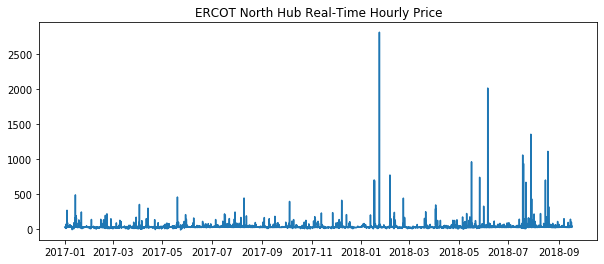

In [177]:
fig,ax = plt.subplots(1, 1, figsize = (10, 4))
ax.plot(dff['DATETIME'], dff['HB_NORTH (RTLMP)'])
ax.set_title('ERCOT North Hub Real-Time Hourly Price')

Text(0.5, 1.0, 'ERCOT Real-Time Hourly Wind Generation')

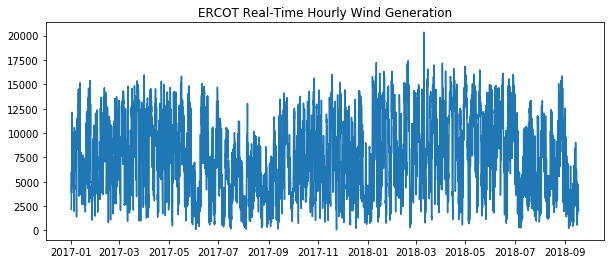

In [178]:
fig,ax = plt.subplots(1, 1, figsize = (10, 4))
ax.plot(dff['DATETIME'], dff['ERCOT (WIND_RTI)'])
ax.set_title('ERCOT Real-Time Hourly Wind Generation')

Text(0.5, 1.0, 'ERCOT Real-Time Hourly Solar Generation')

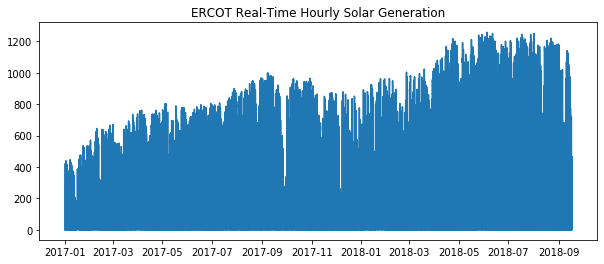

In [179]:
fig,ax = plt.subplots(1, 1, figsize = (10, 4))
ax.plot(dff['DATETIME'], dff['ERCOT (GENERATION_SOLAR_RT)'])
ax.set_title('ERCOT Real-Time Hourly Solar Generation')

Text(0.5, 1.0, 'ERCOT Real-Time Hourly Actual Load')

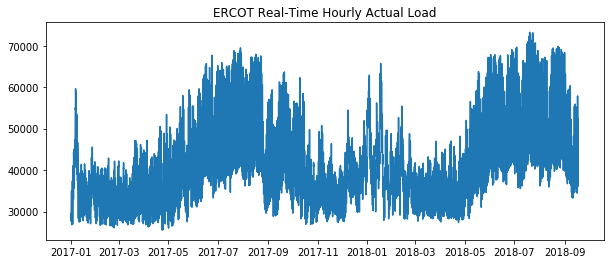

In [180]:
fig,ax = plt.subplots(1, 1, figsize = (10, 4))
ax.plot(dff['DATETIME'], dff['ERCOT (RTLOAD)'])
ax.set_title('ERCOT Real-Time Hourly Actual Load')

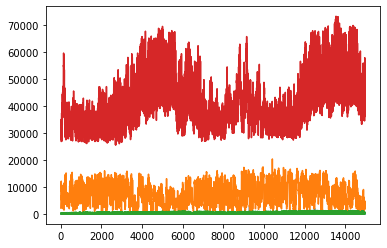

In [181]:
plt.plot(dff.iloc[:,1:5])

In [182]:
data = dff.iloc[:,1:5]
data.head(10)

,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD)
0,23.3575,2155.31,0.00,29485.791355
1,21.4650,2313.81,0.00,28911.565913
2,20.7350,2587.68,0.00,28238.258175
3,20.2700,2748.65,0.00,27821.000513
4,20.1200,2757.49,0.00,27646.942413
5,19.7925,3032.06,0.00,27701.556228
6,19.7225,3823.51,0.00,28244.390345
7,19.7375,4419.88,0.54,28955.926493
8,19.2625,6009.27,87.20,29623.127238
9,19.8625,5107.69,333.42,30677.852305


((array([-3.90947311, -3.6896957 , -3.56927669, ...,  3.56927669,
          3.6896957 ,  3.90947311]),
  array([ -17.86  ,  -13.6075,  -12.53  , ..., 1350.1875, 2010.4625,
         2809.3575])),
 (17.50282406102201, 25.766416607726693, 0.37744457641272894))

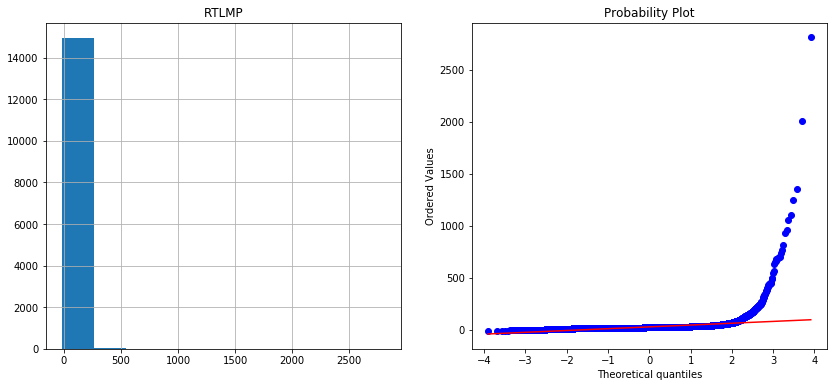

In [183]:
#check normality
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
data['HB_NORTH (RTLMP)'].hist()
plt.title('RTLMP')
plt.subplot(1,2,2)
stats.probplot(data['HB_NORTH (RTLMP)'], plot = plt)

((array([-3.90947311, -3.6896957 , -3.56927669, ...,  3.56927669,
          3.6896957 ,  3.90947311]),
  array([   54.44,   111.76,   112.67, ..., 17414.55, 20350.4 , 20350.4 ])),
 (3933.8408683635225, 7533.32386268099, 0.9845666215163499))

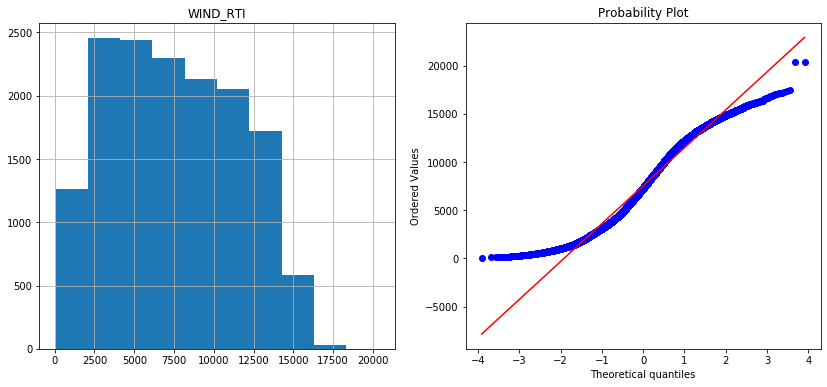

In [184]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
data['ERCOT (WIND_RTI)'].hist()
plt.title('WIND_RTI')
plt.subplot(1,2,2)
stats.probplot(data['ERCOT (WIND_RTI)'], plot = plt)

((array([-3.90947311, -3.6896957 , -3.56927669, ...,  3.56927669,
          3.6896957 ,  3.90947311]),
  array([   0.  ,    0.  ,    0.  , ..., 1249.15, 1249.52, 1257.54])),
 (326.23656764929734, 291.94280176152665, 0.8794138482031248))

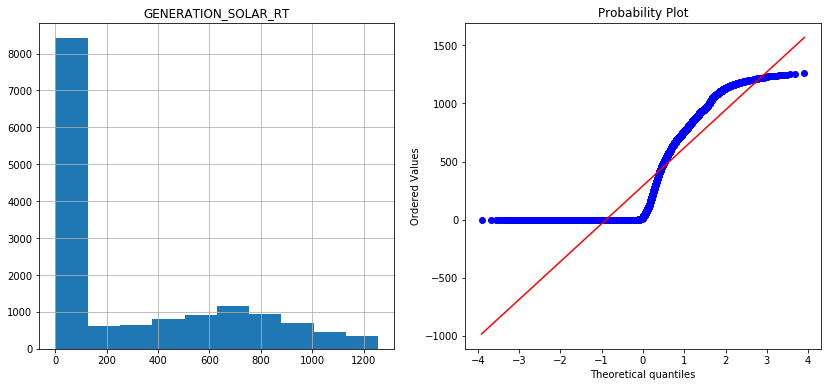

In [185]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
data['ERCOT (GENERATION_SOLAR_RT)'].hist()
plt.title('GENERATION_SOLAR_RT')
plt.subplot(1,2,2)
stats.probplot(data['ERCOT (GENERATION_SOLAR_RT)'], plot = plt)

((array([-3.90947311, -3.6896957 , -3.56927669, ...,  3.56927669,
          3.6896957 ,  3.90947311]),
  array([25566.511248, 25569.673428, 25722.45273 , ..., 73123.28239 ,
         73170.533285, 73264.662123])),
 (9560.350679800105, 42371.67370260145, 0.9679935614867922))

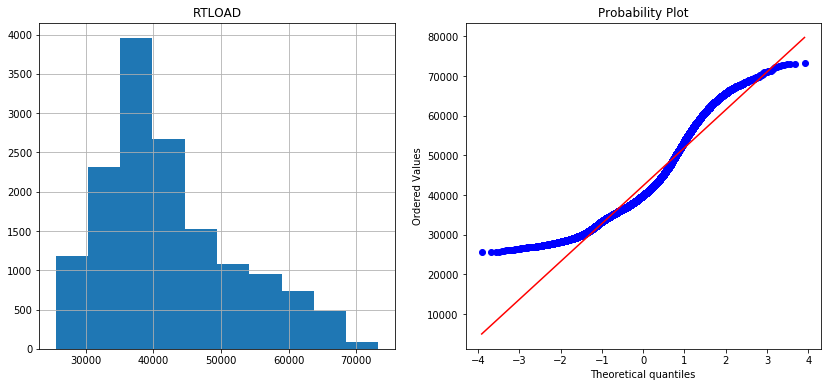

In [186]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
data['ERCOT (RTLOAD)'].hist()
plt.title('RTLOAD')
plt.subplot(1,2,2)
stats.probplot(data['ERCOT (RTLOAD)'], plot = plt)

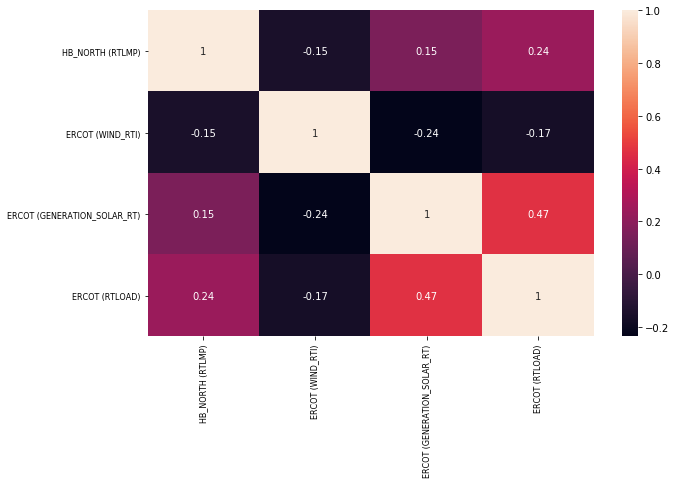

In [187]:
corr = data.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, annot = True)
heat_map = plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

# Model —— VAR

In [188]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_squared_error

In [189]:
# create train and test data
train, test = data.iloc[:-24,:], data.iloc[-24:,:]#predict 24 hours
print(train.shape, test.shape)

(14963, 4) (24, 4)


In [190]:
#check stationarity
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")

print("RTLMP:")
adf_test(train['HB_NORTH (RTLMP)'])
print("WIND_RTI:")
adf_test(train['ERCOT (WIND_RTI)'])
print("GENERATION_SOLAR_RT:")
adf_test(train['ERCOT (GENERATION_SOLAR_RT)'])
print("RTLOAD:")
adf_test(train['ERCOT (RTLOAD)'])#no need to take a first difference

RTLMP:
Test Statistic         -1.828574e+01
p-value                 2.303118e-30
# Lags                  2.400000e+01
# Observations          1.493800e+04
Critical Value (1%)    -3.430788e+00
Critical Value (5%)    -2.861734e+00
Critical Value (10%)   -2.566873e+00
dtype: float64
 Series is Stationary
WIND_RTI:
Test Statistic         -1.158489e+01
p-value                 2.883379e-21
# Lags                  4.100000e+01
# Observations          1.492100e+04
Critical Value (1%)    -3.430788e+00
Critical Value (5%)    -2.861734e+00
Critical Value (10%)   -2.566873e+00
dtype: float64
 Series is Stationary
GENERATION_SOLAR_RT:
Test Statistic         -7.584895e+00
p-value                 2.622485e-11
# Lags                  4.200000e+01
# Observations          1.492000e+04
Critical Value (1%)    -3.430788e+00
Critical Value (5%)    -2.861734e+00
Critical Value (10%)   -2.566873e+00
dtype: float64
 Series is Stationary
RTLOAD:
Test Statistic             -5.077353
p-value                     0

In [191]:
# check for causality
variables = data.columns  
matrix = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
for col in matrix.columns:
    for row in matrix.index:
        test_result = grangercausalitytests(data[[row, col]], maxlag=20, verbose=False)            
        p_values = [round(test_result[i+1][0]['ssr_chi2test'][1],4) for i in range(20)]            
        min_p_value = np.min(p_values)
        matrix.loc[row, col] = min_p_value
matrix.columns = [var + '_x' for var in variables]
matrix.index = [var + '_y' for var in variables]
print(matrix)#given that all values are all below 0.05 except the diagonal, reject that the null hypothesis and this dataset is a good candidate of VectorARIMA modeling.

                               HB_NORTH (RTLMP)_x  ERCOT (WIND_RTI)_x  \
HB_NORTH (RTLMP)_y                            1.0                 0.0   
ERCOT (WIND_RTI)_y                            0.0                 1.0   
ERCOT (GENERATION_SOLAR_RT)_y                 0.0                 0.0   
ERCOT (RTLOAD)_y                              0.0                 0.0   

                               ERCOT (GENERATION_SOLAR_RT)_x  ERCOT (RTLOAD)_x  
HB_NORTH (RTLMP)_y                                       0.0               0.0  
ERCOT (WIND_RTI)_y                                       0.0               0.0  
ERCOT (GENERATION_SOLAR_RT)_y                            1.0               0.0  
ERCOT (RTLOAD)_y                                         0.0               1.0  


In [192]:
#fitting
model = VAR(train)
fit = model.fit(maxlags = 20, ic = 'aic')
fit.summary()#the biggest correlations are 0.072 (RTLMP & RTPOAD) and 0.055 (WIND_RTI & RTLOAD) (small enough to ignore)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 16, May, 2022
Time:                     12:52:57
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    41.5117
Nobs:                     14943.0    HQIC:                   41.4014
Log likelihood:          -393410.    FPE:                9.04956e+17
AIC:                      41.3467    Det(Omega_mle):     8.85597e+17
--------------------------------------------------------------------
Results for equation HB_NORTH (RTLMP)
                                     coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------
const                                   1.719812         2.144024            0.802           0.422
L1.HB_NORTH (RTLMP)                     0.468781         0.008236           

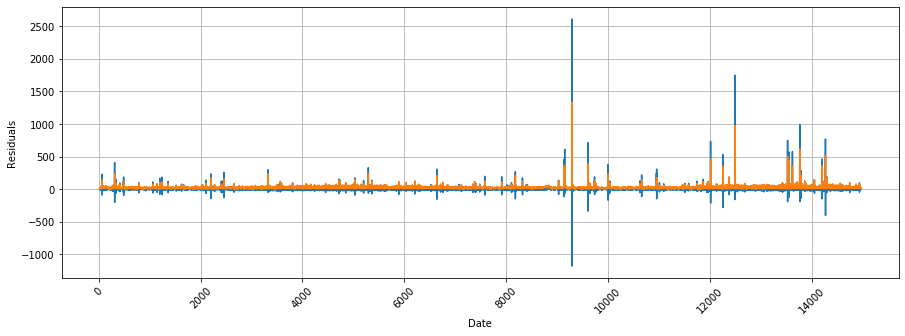

In [193]:
#residual plot
plt.figure(figsize = (15,5))
plt.plot(fit.resid['HB_NORTH (RTLMP)'], label='resid')
plt.plot(fit.fittedvalues['HB_NORTH (RTLMP)'], label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)
#looks normal with constant mean

In [194]:
#Durbin-Watson test
DW = durbin_watson(fit.resid)
for col, val in zip(data.columns, DW):
    print((col),":",val)
#result of residuals in the model are around 2, between 1.5 and 2.5, which means autocorrelation is likely not a cause for concern

HB_NORTH (RTLMP) : 2.0011419602169327
ERCOT (WIND_RTI) : 2.000349301082866
ERCOT (GENERATION_SOLAR_RT) : 2.1028136039062484
ERCOT (RTLOAD) : 1.9975613354295998


In [195]:
#forecast
lag_order = fit.k_ar
forecast = fit.forecast(y = train.values[-lag_order:], steps = 24)
forecast = pd.DataFrame(forecast, columns = variables)
forecast.head()

,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD)
0,38.154912,2041.531283,493.162012,51483.342245
1,43.729823,2107.651186,474.903818,53837.209191
2,55.497889,2316.037021,503.228542,55347.101220
3,58.509814,2725.733864,551.013823,55944.077449
4,56.336830,3156.737245,570.187119,55502.552441


Text(0.5, 1.0, 'Forecast of RTLMP')

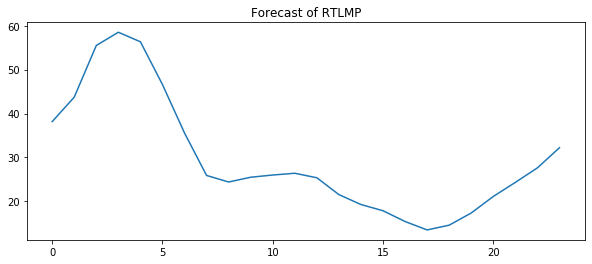

In [196]:
fig,ax = plt.subplots(1, 1, figsize = (10, 4))
ax.plot(range(24), forecast['HB_NORTH (RTLMP)'])
ax.set_title('Forecast of RTLMP')

In [197]:
#evaluation
forecast_errors = [test.iloc[i,0]- forecast.iloc[i,0] for i in range(test.shape[0])]
bias = sum(forecast_errors)/test.shape[0]
print('Bias: %f' % bias)
print('RMSE:', np.sqrt(mean_squared_error(test['HB_NORTH (RTLMP)'].values, forecast['HB_NORTH (RTLMP)'].values)))

Bias: 2.472717
RMSE: 8.808111851099788
